# Sales Performance Analysis

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [49]:
# Load the data
df = pd.read_csv('superstore_final.csv', encoding='ISO-8859-1')
print(df.head())

   Row_ID        Order_ID Order_Date Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   08-11-17  11-11-17    Second Class    CG-12520   
1       2  CA-2017-152156   08-11-17  11-11-17    Second Class    CG-12520   
2       3  CA-2017-138688   12-06-17  16-06-17    Second Class    DV-13045   
3       4  US-2016-108966   11-10-16  18-10-16  Standard Class    SO-20335   
4       5  US-2016-108966   11-10-16  18-10-16  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Category Sub_Category

In [50]:
df.nunique()

Row_ID           9800
Order_ID         4922
Order_Date       1230
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              529
State              49
Postal_Code       626
Region              4
Product_ID       1861
Category            3
Sub_Category       17
Product_Name     1849
Sales            5757
dtype: int64

## Data Cleaning

In [52]:
# Handle missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Ensure proper data types
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9789 non-null   int64         
 1   Order_ID       9789 non-null   object        
 2   Order_Date     9789 non-null   datetime64[ns]
 3   Ship_Date      9789 non-null   datetime64[ns]
 4   Ship_Mode      9789 non-null   object        
 5   Customer_ID    9789 non-null   object        
 6   Customer_Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product_ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub_Category   9789 n

## Exploratory Data Analysis (EDA)

In [56]:
# Descriptive statistics
print(df.describe())

            Row_ID   Postal_Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000


In [120]:
# Total sales over time - year
sales_trend = df.groupby(df['Order_Date'].dt.year)['Sales'].sum()

# Total sales over time - month
sales_month = df.groupby(df['Order_Date'].dt.month)['Sales'].sum()

# Sales by region
region_performance = df.groupby('Region')['Sales'].sum()

# Sales by product category
category_performance = df.groupby('Category')['Sales'].sum()

In [ ]:
# Group by customer segment and sum sales_amount
sales_by_segment = df.groupby('Segment')['Sales'].sum()

In [84]:
# Group by product and sum sales_amount
product_performance = df.groupby('Product_Name')['Sales'].sum()

# Identify popular products
popular_products = product_performance.sort_values(ascending=False)

In [86]:
# Calculate purchase frequency for each customer
customer_frequency = df.groupby('Customer_ID')['Sales'].count()

# Calculate average transaction value
average_transaction_value = df.groupby('Customer_ID')['Sales'].mean()

In [82]:
# Identify peak sales periods
peak_period = sales_trend.idxmax()
print(f"Peak sales period: {peak_period}")

# Identify underperforming regions
underperforming_regions = region_performance[region_performance < region_performance.mean()]
print("Underperforming regions:", underperforming_regions)

# Underperforming product categories
underperforming_categories = category_performance[category_performance < category_performance.mean()]
print("Underperforming categories:", underperforming_categories)

Peak sales period: 2018
Underperforming regions: Region
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64
Underperforming categories: Category
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64


## Visualization

In [110]:
theme = sns.color_palette("Set2", n_colors=8)

### Sales Trend by Year

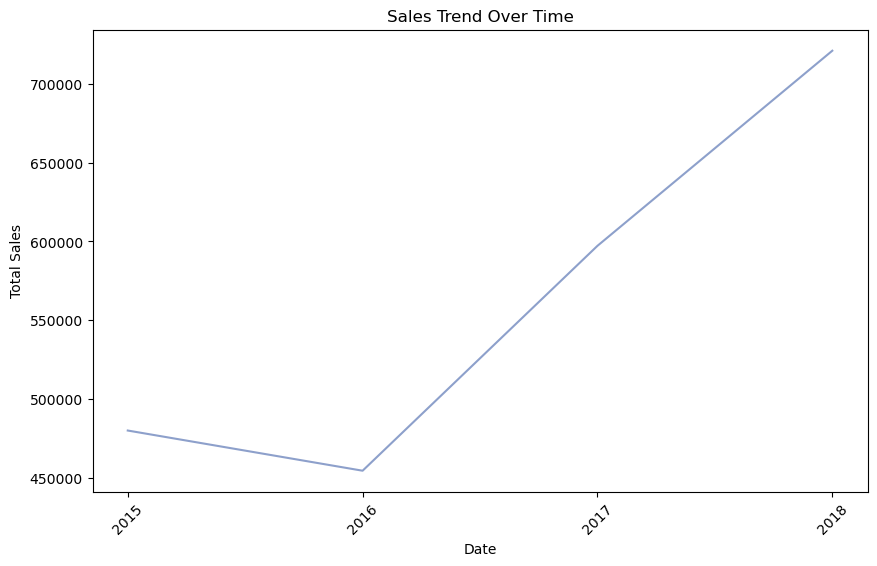

In [111]:
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', color=theme[2])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(sales_trend.index, rotation=45)
plt.show()

- Peak sales occurred in 2018, suggesting a successful year in terms of revenue generation.
- Sales trends over months show fluctuations, highlighting specific periods of higher activity. This seasonal variation could be leveraged for targeted campaigns.

### Sales Trend by Month

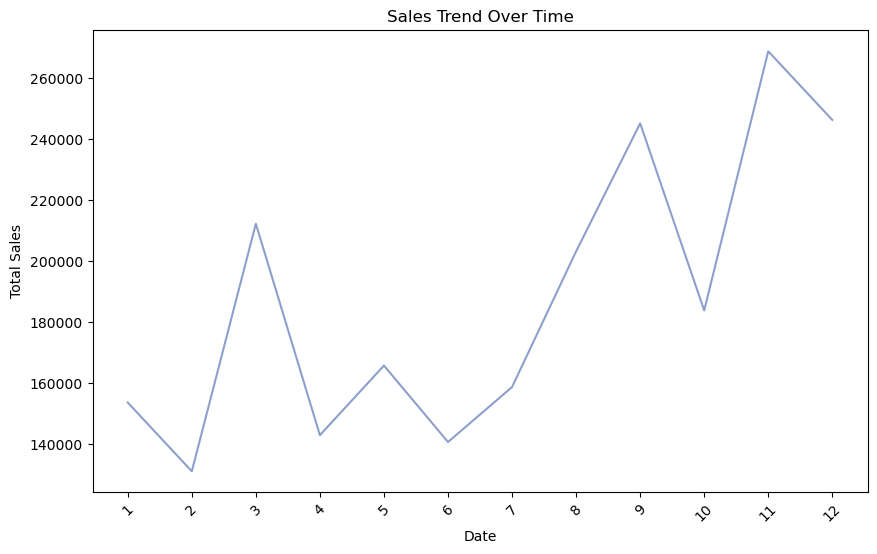

In [122]:
plt.figure(figsize=(10, 6))
sales_month.plot(kind='line', color=theme[2])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(sales_month.index, rotation=45)
plt.show()

### Regional Performance

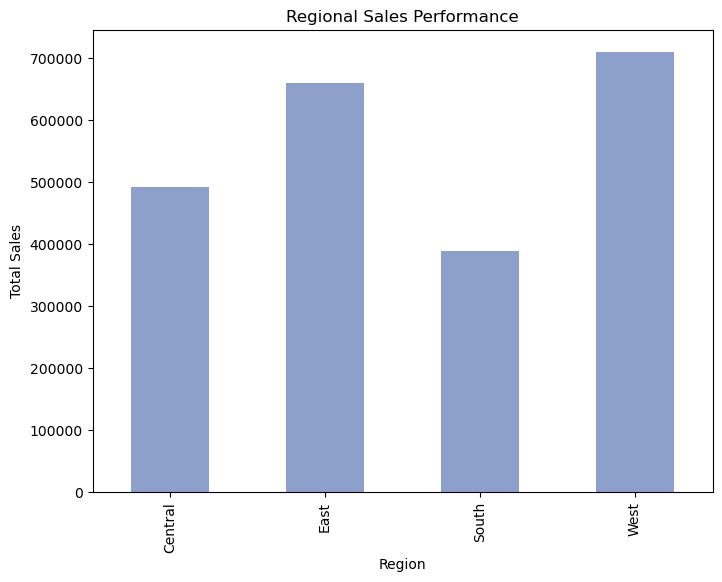

In [100]:
plt.figure(figsize=(8, 6))
region_performance.plot(kind='bar', color=theme[2])
plt.title('Regional Sales Performance')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

- The Central region and South region underperformed compared to others.
- The West region emerged as a leader in sales, indicating potential for growth in other regions.

### Product category distribution

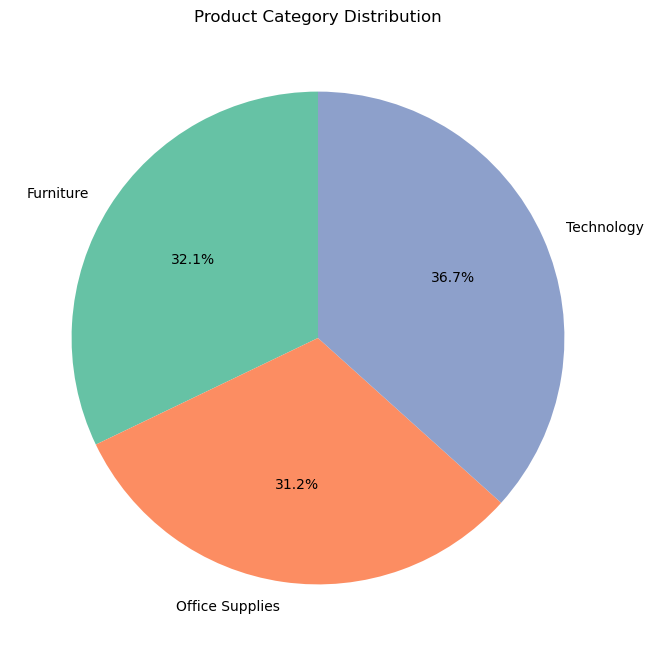

In [118]:
plt.figure(figsize=(8, 8))
category_performance.plot(kind='pie', colors=theme, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

### Region wise Product Performance

<Figure size 1200x800 with 0 Axes>

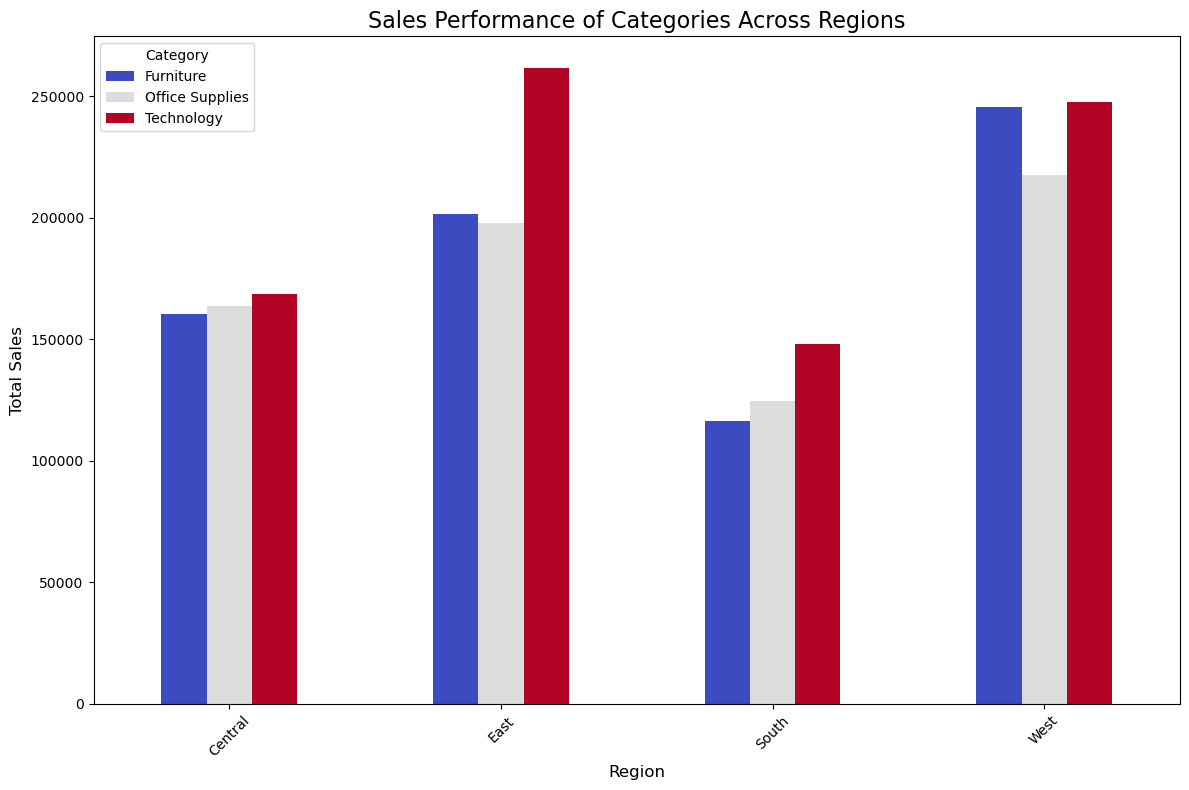

In [125]:
# Group data by Region and Category
region_category = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Pivot the data for visualization
region_category_pivot = region_category.pivot(index='Region', columns='Category', values='Sales')

# Plot the comparison
plt.figure(figsize=(12, 8))
region_category_pivot.plot(kind='bar', colormap='coolwarm', figsize=(12, 8))
plt.title('Sales Performance of Categories Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.tight_layout()
plt.show()


### Sub Category Sales

<Figure size 1200x800 with 0 Axes>

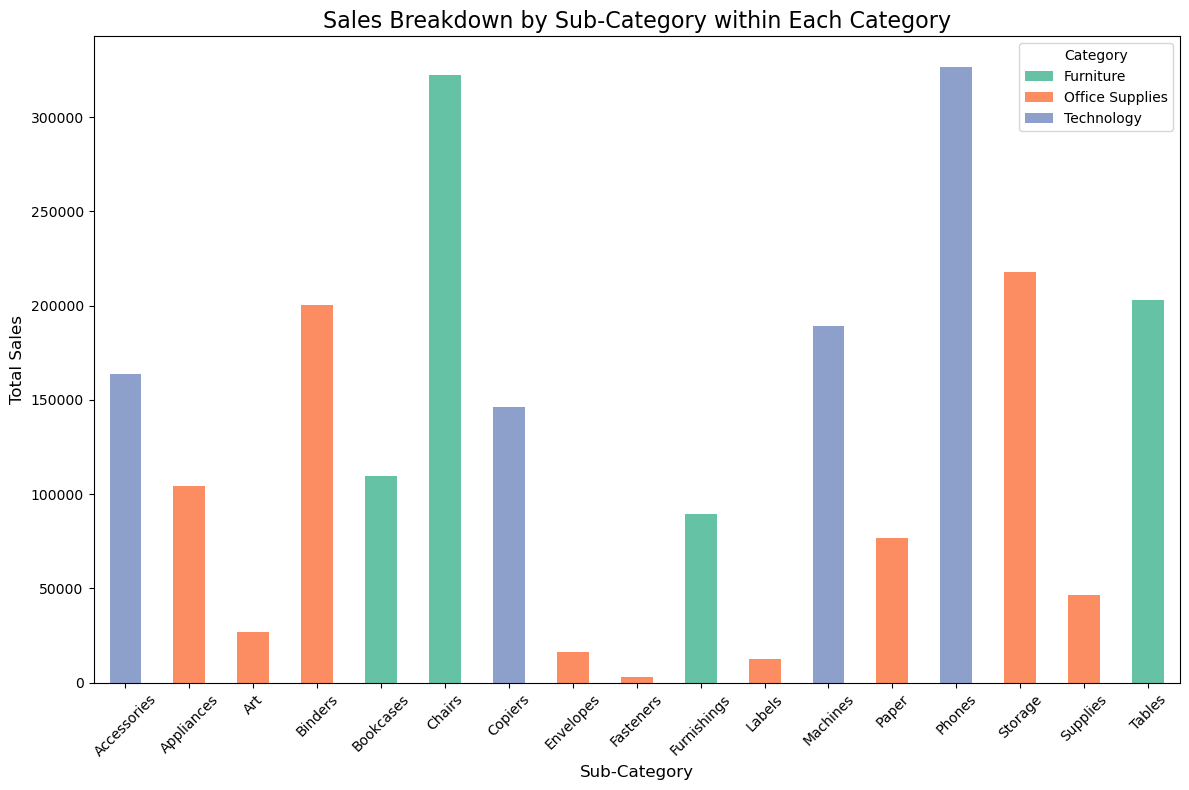

In [124]:
# Group data by Category and Sub-Category
category_subcategory = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().reset_index()

# Pivot the data for visualization
category_subcategory_pivot = category_subcategory.pivot(index='Sub_Category', columns='Category', values='Sales')

# Plot the breakdown
plt.figure(figsize=(12, 8))
category_subcategory_pivot.plot(kind='bar', stacked=True, color=theme, figsize=(12, 8))
plt.title('Sales Breakdown by Sub-Category within Each Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.tight_layout()
plt.show()

### Sales by Customer Segment

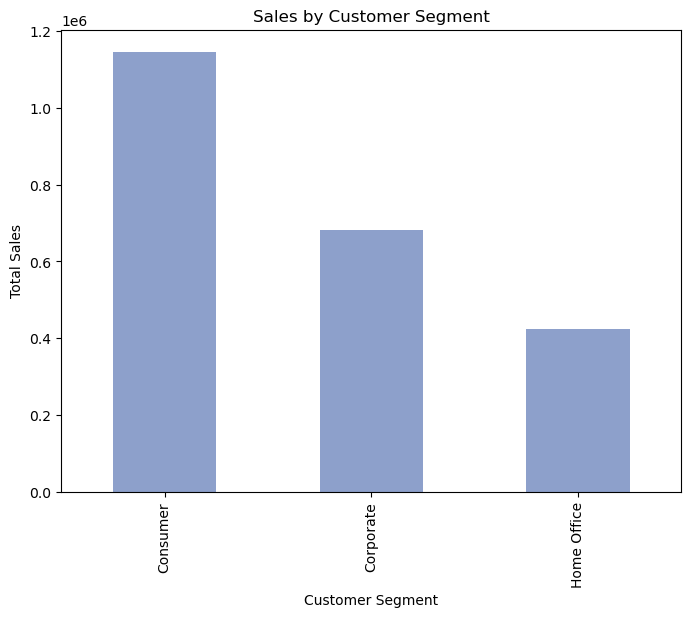

In [113]:
plt.figure(figsize=(8, 6))
sales_by_segment.plot(kind='bar', color=theme[2])
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

### Year-over-Year Sales

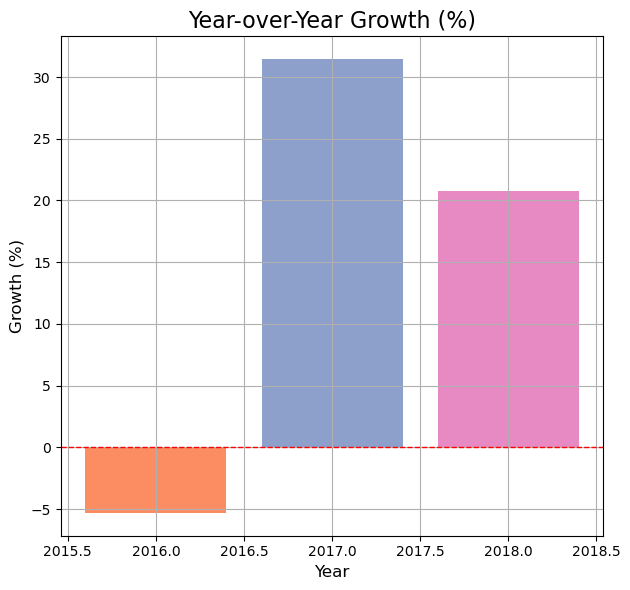

In [131]:
# Extract year from Order_Date and calculate yearly sales
df['Year'] = df['Order_Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Calculate Year-over-Year growth
yearly_sales['YoY Growth (%)'] = yearly_sales['Sales'].pct_change() * 100

# Plot yearly sales and YoY growth
plt.figure(figsize=(12, 6))

# YoY growth
plt.subplot(1, 2, 2)
plt.bar(yearly_sales['Year'], yearly_sales['YoY Growth (%)'], color=theme)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Year-over-Year Growth (%)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

- A mixed trend in YoY growth was observed, with periods of decline suggesting potential gaps in strategy or market engagement.

### Product Performance

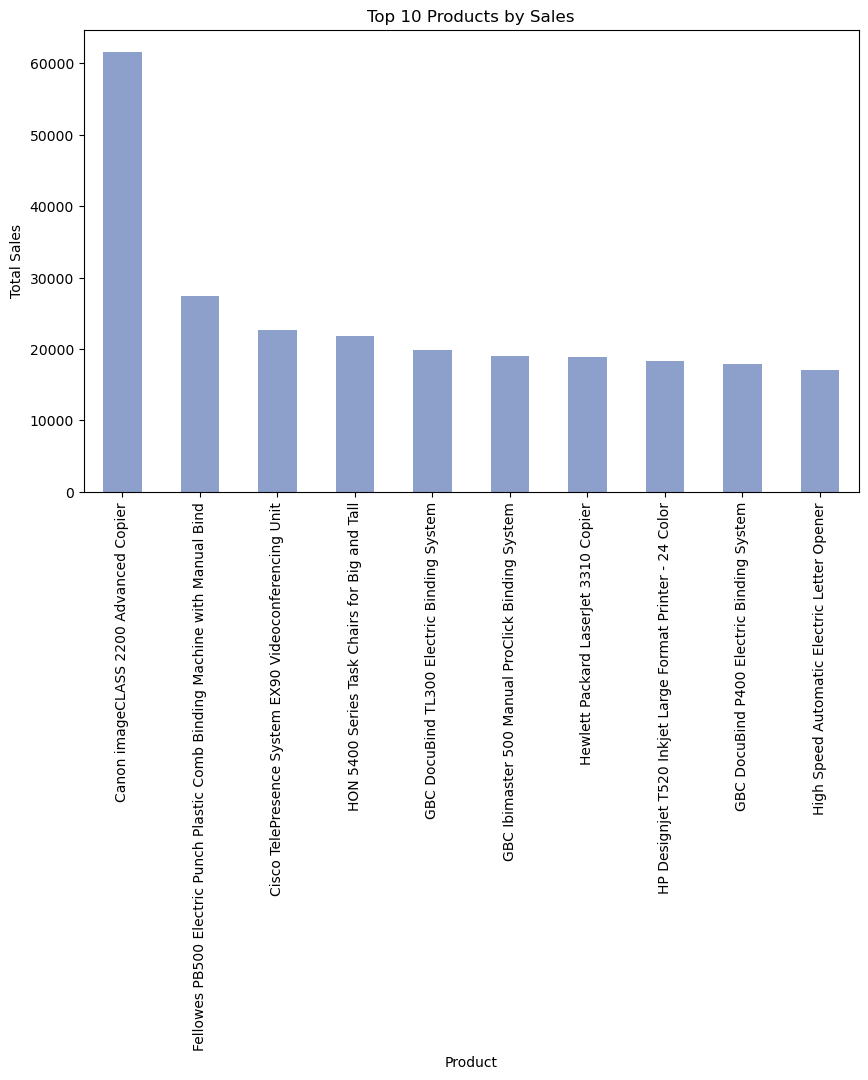

In [114]:
plt.figure(figsize=(10, 6))
popular_products.head(10).plot(kind='bar', color=theme[2])
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

### Customer Purchase Frequency and Average Transaction Value

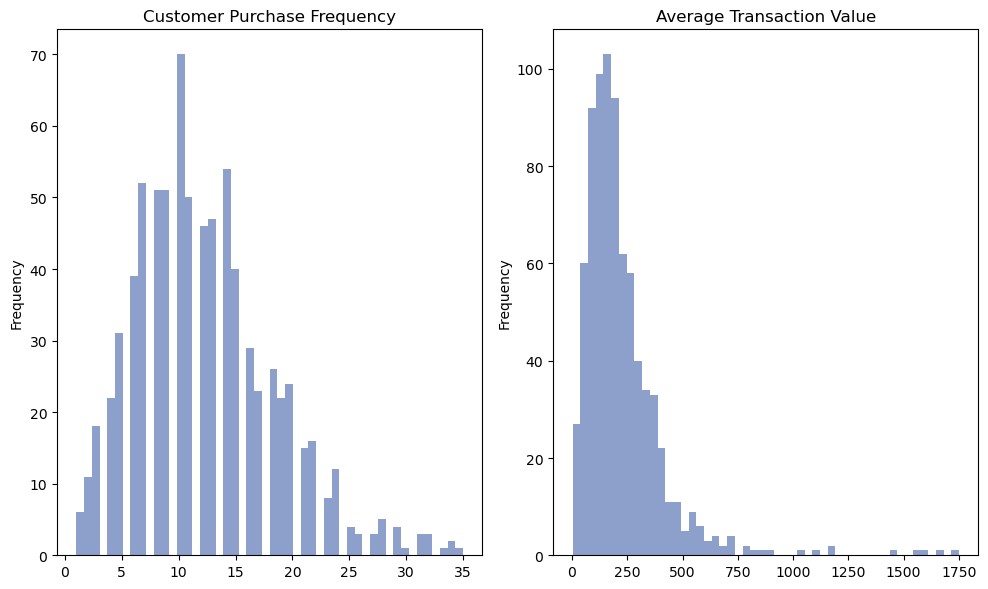

In [116]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
customer_frequency.plot(kind='hist', bins=50, color=theme[2])
plt.title('Customer Purchase Frequency')

plt.subplot(1, 2, 2)
average_transaction_value.plot(kind='hist', bins=50, color=theme[2])
plt.title('Average Transaction Value')

plt.tight_layout()
plt.show()

- Purchase frequency and average transaction values varied significantly among customers.

### Recommendations

1. Address underperforming regios: 
Focus on Central and South regions.
Investigate why sales in these regions lag behind others, such as local preferences, competition, or distribution challenges.
Implement region-specific promotional offers and localized advertising campaigns.

2. Revitalize Underperforming Categories:
Furniture and Office Supplie.
Evaluate the pricing strategy to ensure competitiveness in these categories.
Highlight key features and benefits of underperforming products in marketing efforts.

3. Enhance Sales in Peak Periods:
Launch strategic marketing campaigns leading up to these high-demand periods.
Ensure sufficient inventory to meet demand spikes during peak seasons.

4. Leverage High-Performing Products:
See the top 10 products by sales.
Prioritize these products in marketing campaigns.
Explore expanding these product lines or offering variants to attract more customers. 